# Определение перспективного тарифа для телеком-компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

**Тариф «Смарт»**

1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**

1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей
    
    
**Цель исследования**

Проверим гипотезы:

 1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
 2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
 
**Ход исследования:**

Данные получены из нескольких файлов, необходимо провести:
 - обзор данных
 - предобработку данных
 - анализ и описание данных
 - проверку гипотез

## Обзор данных

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [88]:
calls = pd.read_csv('/datasets/calls.csv')

In [89]:
internet = pd.read_csv('/datasets/internet.csv')

In [90]:
messages = pd.read_csv('/datasets/messages.csv')

In [91]:
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [92]:
users = pd.read_csv('/datasets/users.csv')

In [93]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [94]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Итак, в таблице Сalls 4 колонки, с типами данных float64, int64, object.

Описание данных:

   * id — уникальный номер звонка
   * call_date — дата звонка
   * duration — длительность звонка в минутах
   * user_id — идентификатор пользователя, сделавшего звонок 

Пропусков в данных нет, нарушения стиля в названиях тоже. Просмотрим остальные файлы.

In [95]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [96]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


В датасете Internet 5 колонок типа float64, int64, object.

Описание данных:

   * id — уникальный номер сессии
   * mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
   * session_date — дата интернет-сессии
   * user_id — идентификатор пользователя

Пропусков данных нет, однако первый столбец дублирует индексы, его следует удалить.

In [97]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [98]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В Messages 3 колонки типа int64 и object.

Описание данных:

   * id — уникальный номер сообщения
   * message_date — дата сообщения
   * user_id — идентификатор пользователя, отправившего сообщение

Пропусков в данных нет, нарушения стиля нет.

In [99]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [100]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Таблица Tariffs включает в себя 8 столбцов типа int и object, содержащие всю информацию о тарифах компании.

Описание данных:

   * tariff_name — название тарифа
   * rub_monthly_fee — ежемесячная абонентская плата в рублях
   * minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
   * messages_included — количество сообщений в месяц, включённых в абонентскую плату
   * mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
   * rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
   * rub_per_message — стоимость отправки сообщения сверх тарифного пакета
   * rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Нарушения стиля в написании названий колонок нет, пропусков тоже. Продолжим обзор данных.

In [101]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [102]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В колонках **Users** данные типа int64 и object.

Описание данных:

- *user_id* — уникальный идентификатор пользователя
- *first_name* — имя пользователя
- *last_name* — фамилия пользователя
- *age* — возраст пользователя (годы)
- *reg_date* — дата подключения тарифа (день, месяц, год)
- *churn_date* — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- *city* — город проживания пользователя
- *tariff* — название тарифного плана

Нарушения стиля нет. Есть пропуски в одном столбце.

## Предобработка данных

### Замена типов, заполнение пропусков, удаление лишних колонок

#### Calls - таблица звонков 

In [103]:
calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

Пропусков в таблице нет, типы столбцов соответствуют данным.

In [104]:
calls['id'].unique()

array(['1000_0', '1000_1', '1000_2', ..., '1499_217', '1499_218',
       '1499_219'], dtype=object)

In [105]:
calls['call_date'].value_counts()

2018-12-31    1435
2018-12-29    1202
2018-12-30    1192
2018-12-22    1158
2018-12-26    1149
              ... 
2018-01-05      20
2018-01-07      18
2018-01-02       9
2018-01-03       7
2018-01-01       5
Name: call_date, Length: 365, dtype: int64

Заметим, что больше всего звонков совершается в предновогодние и новогодние дни. Добавим столбец со значением по месяцам звонков.

In [106]:
calls['month'] = pd.to_datetime(calls['call_date'], format= '%Y-%m-%d').dt.month

In [107]:
calls['duration'].value_counts()

0.00     39613
5.50       142
4.49       142
6.15       141
6.38       141
         ...  
26.32        1
24.51        1
27.24        1
29.89        1
27.43        1
Name: duration, Length: 2871, dtype: int64

В столбце `duration` много звонков с нулевой длительностью - это пропущенные звонки.

In [108]:
calls['duration'] = np.ceil(calls['duration'])

In [109]:
calls['user_id'].unique()

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099,
       1100, 1101, 1102, 1103, 1104, 1105, 1107, 1108, 1109, 1110, 1111,
       1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122,
       1123, 1124, 1125, 1126, 1127, 1129, 1130, 1131, 1132, 1133, 1134,
       1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145,
       1146, 1147, 1148, 1149, 1150, 1151, 1152, 11

В таблице отсутствуют данные о пользователях - 1091, 1106, 1128, 1231, 1328, 1473.

In [110]:
calls.duplicated().sum()

0

#### Internet - информация об интернет-сессиях

In [111]:
internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

Пропусков в данных нет, однако первый столбец дублирует индексы. Его следует удалить.

In [112]:
internet['id'].unique()

array(['1000_0', '1000_1', '1000_2', ..., '1499_154', '1499_155',
       '1499_156'], dtype=object)

In [113]:
internet['mb_used'].unique()

array([ 112.95, 1052.81, 1197.26, ...,  460.75,  247.59,   23.72])

In [114]:
internet['session_date'].value_counts()

2018-12-31    1057
2018-12-30     903
2018-12-25     859
2018-12-26     844
2018-12-22     834
              ... 
2018-01-05      14
2018-01-04       9
2018-01-03       6
2018-01-02       3
2018-01-01       3
Name: session_date, Length: 365, dtype: int64

В столбце `session_date` представлены данные за 2018год. Больше всего трафика тратится в декабре, особенно на Новый год. добавим новый столбец со значением месяца интернет-сессии:

In [115]:
internet['month'] = pd.to_datetime(internet['session_date'], format= '%Y-%m-%d').dt.month

In [116]:
internet['user_id'].unique()

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120,
       1121, 1122, 1123, 1124, 1125, 1126, 1127, 1129, 1130, 1131, 1132,
       1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143,
       1144, 1145, 1146, 1147, 1148, 1149, 1150, 11

В `user_id` отсутствуют данные по некоторым пользователям - 1128, 1273, 1371.

In [117]:
internet = internet.drop(columns = ['Unnamed: 0'])

In [118]:
internet.duplicated().sum()

0

#### Messages - информация о сообщениях

In [119]:
messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [120]:
messages['id'].unique()

array(['1000_0', '1000_1', '1000_2', ..., '1499_181', '1499_182',
       '1499_183'], dtype=object)

In [121]:
messages['user_id'].unique()

array([1000, 1002, 1003, 1004, 1005, 1007, 1008, 1009, 1011, 1012, 1013,
       1014, 1015, 1016, 1018, 1019, 1020, 1021, 1022, 1023, 1025, 1026,
       1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037,
       1038, 1039, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1050,
       1051, 1052, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062,
       1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074,
       1075, 1076, 1077, 1079, 1080, 1081, 1082, 1083, 1084, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1096, 1097, 1098, 1099,
       1100, 1102, 1103, 1104, 1105, 1106, 1108, 1109, 1110, 1111, 1112,
       1113, 1115, 1119, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1130,
       1131, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142,
       1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1154, 1155, 1156,
       1158, 1159, 1160, 1161, 1163, 1164, 1165, 1166, 1167, 1168, 1169,
       1170, 1171, 1172, 1173, 1174, 1176, 1178, 11

В данном столбце таблицы так же остутствует информация о нескольких пользователях - 1001, 1006, 1010, 1017, 1024 и т.д.

In [122]:
messages['message_date'].value_counts()

2018-12-31    859
2018-12-30    765
2018-12-21    712
2018-12-29    702
2018-12-28    699
             ... 
2018-01-07     12
2018-01-04     10
2018-01-02     10
2018-01-05     10
2018-01-03      4
Name: message_date, Length: 364, dtype: int64

В столбце `message_date` информация со 2 января по 31 декабря 2018года. Добавим столбец месяца отправки сообщения.

In [123]:
messages['month'] = pd.to_datetime(messages['message_date'], format= '%Y-%m-%d').dt.month

In [124]:
messages.duplicated().sum()

0

#### Tariffs - информация о тарифах 

In [125]:
tariffs.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

In [126]:
tariffs['tariff_name'].unique()

array(['smart', 'ultra'], dtype=object)

In [127]:
tariffs.duplicated().sum()

0

#### Users - информация о пользователях

In [128]:
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [129]:
users['churn_date'].unique()

array([nan, '2018-10-05', '2018-12-18', '2018-11-21', '2018-10-03',
       '2018-10-14', '2018-12-09', '2018-12-11', '2018-12-26',
       '2018-08-31', '2018-12-03', '2018-12-23', '2018-11-07',
       '2018-12-16', '2018-12-20', '2018-11-30', '2018-12-21',
       '2018-08-17', '2018-09-02', '2018-10-04', '2018-11-13',
       '2018-11-22', '2018-10-28', '2018-11-26', '2018-11-27',
       '2018-11-16', '2018-10-27', '2018-12-30', '2018-09-27',
       '2018-12-25', '2018-12-14', '2018-12-24', '2018-09-26',
       '2018-10-25'], dtype=object)

Пропуски в данном столбце обрабатывать не нужно, тариф еще действовал на момент выгрузки данных.

In [130]:
users['user_id'].unique()

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120,
       1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131,
       1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142,
       1143, 1144, 1145, 1146, 1147, 1148, 1149, 11

In [131]:
users['age'].unique()

array([52, 41, 59, 23, 68, 67, 21, 65, 63, 24, 26, 44, 38, 36, 64, 58, 73,
       71, 61, 72, 42, 56, 32, 62, 20, 51, 28, 66, 31, 37, 47, 40, 69, 48,
       33, 39, 43, 46, 45, 55, 53, 34, 49, 25, 18, 70, 50, 19, 54, 60, 29,
       27, 74, 22, 30, 75, 57, 35])

In [132]:
users['city'].value_counts()

Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Нижневартовск       1
Архангельск         1
Подольск            1
Иваново             1
Химки               1
Name: city, Length: 76, dtype: int64

Заметим, что в данных много пользователей из Москвы и Петербурга.

In [133]:
users['first_name'].value_counts()

Радим       6
Пётр        5
Леонид      5
Андрей      4
Тамара      4
           ..
Сабина      1
Майя        1
Исаак       1
Агата       1
Мальвина    1
Name: first_name, Length: 246, dtype: int64

In [134]:
users['last_name'].value_counts()

Андреенко     5
Булгаков      3
Березина      3
Алексеенко    3
Озерова       3
             ..
Кабанова      1
Крюкова       1
Румянцева     1
Авросинова    1
Платонова     1
Name: last_name, Length: 419, dtype: int64

In [135]:
users['reg_date'].value_counts()

2018-05-28    8
2018-07-16    5
2018-11-16    5
2018-01-04    5
2018-10-05    5
             ..
2018-07-17    1
2018-12-06    1
2018-03-13    1
2018-11-12    1
2018-05-16    1
Name: reg_date, Length: 270, dtype: int64

Добавим новую колонку с месяцем подключения тарифа.

In [136]:
users['reg_month'] = pd.to_datetime(users['reg_date'], format= '%Y-%m-%d').dt.month

In [137]:
users['tariff'].unique()

array(['ultra', 'smart'], dtype=object)

In [138]:
users.duplicated().sum()

0

Итак, после просмотра данных:
- мы удалили ненужный столбец в Датасете *Internet*, дублирующий индексы; добавлен столбец месяца совершения интернет сессии `month`. 
- В *Users* добавлен столбец значения месяца поключения тарифа `reg_month`. 
- Так же были добавлены столбцы со значениями месяца совершения звонка и месяца отправки сообщения `month` в *Calls* и *Messages* соответственно.

### Подготовка пользовательских данных

Посчитаем для каждого пользователя:

- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;

In [139]:
month_call = calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = ['count', 'sum'])
month_call.head()

count      sum
              duration duration
user_id month                  
1000    5           22    159.0
        6           43    172.0
        7           47    340.0
        8           52    408.0
        9           58    466.0

In [140]:
month_call.columns = ['dur_count', 'dur_sum']

In [141]:
# month_call['dur_sum'] = np.ceil(month_call['dur_sum'])

Больше всего звонков и истраченных минут, как уже было ранее замечено, приходится на декабрь.

In [142]:
month_sms = messages.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = ['count'])
month_sms.head()

count
                 id
user_id month      
1000    5        22
        6        60
        7        75
        8        81
        9        57

In [143]:
month_sms.columns = ['message_count']

In [144]:
month_session = internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = ['sum'])
month_session.head()

sum
                mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91

In [145]:
month_session.columns = ['gb_used']

In [146]:
month_session['gb_used'] = np.ceil(month_session['gb_used'] / 1024)
month_session.head()

gb_used
user_id month         
1000    5          3.0
        6         23.0
        7         14.0
        8         14.0
        9         15.0

Соберем общую таблицу *Мonth_stat* с данными:

In [147]:
month_stat = (
    month_session.merge(month_call, on = ['user_id', 'month'], how = 'outer')
    .merge(month_sms, on = ['user_id', 'month'], how = 'outer')
)

Добавим для каждого пользователя название его тарифа:

In [148]:
user_tariff = users.loc[:, ['user_id', 'city', 'tariff']]

In [149]:
month_stat = (
    month_stat.reset_index()
    .sort_values(by = ['user_id', 'month'])
    .merge(user_tariff, on = ['user_id'], how='outer')
)

Напишем функцию для автоматизации подсчета значений выручки, в зависимости от тарифа пользователя:

In [150]:
# прибыль от звонков
def duration(row):
    if row['tariff'] == 'smart':
        minute = row['dur_sum'] - tariffs.loc[0, 'minutes_included']
        if minute > 0:
            return minute * tariffs.loc[0, 'rub_per_minute']
        return 0
    if row['tariff'] != 'smart':
        minute = row['dur_sum'] - tariffs.loc[1, 'minutes_included']
        if minute > 0:
            return minute * tariffs.loc[1, 'rub_per_minute']
        return 0

In [151]:
# прибыль по трафику
def iternet(row):
    if row['tariff'] == 'smart':
        gb = row['gb_used'] - (tariffs.loc[0, 'mb_per_month_included'] / 1024)
        if gb > 0:
            return gb * tariffs.loc[0, 'rub_per_gb']
        return 0
    if row['tariff'] != 'smart':
        gb = row['gb_used'] - (tariffs.loc[1, 'mb_per_month_included'] / 1024)
        if gb > 0:
            return gb * tariffs.loc[1, 'rub_per_gb']
        return 0

In [152]:
# прибыль от смс
def message(row):
    if row['tariff'] == 'smart':
        sms = row['message_count'] - tariffs.loc[0, 'messages_included']
        if sms > 0:
            return sms * tariffs.loc[0, 'rub_per_message']
        return 0
    if row['tariff'] != 'smart':
        sms = row['message_count'] - tariffs.loc[1, 'messages_included']
        if sms > 0:
            return sms * tariffs.loc[1, 'rub_per_message']
        return 0

Расчитаем помесячную выручку с каждого пользователя и запишем ее в новый столбец:

In [153]:
def get_income(row):
    if row['tariff'] == 'smart':
        income = tariffs.loc[0, 'rub_monthly_fee'] + message(row) + iternet(row) + duration(row)
        return income
    if row['tariff'] == 'ultra':
        income = tariffs.loc[1, 'rub_monthly_fee'] + message(row) + iternet(row) + duration(row)
        return income

In [154]:
# столбец с итоговой прибылью
month_stat['income'] = month_stat.apply(get_income, axis=1)
month_stat.tail()

,user_id,month,gb_used,dur_count,dur_sum,message_count,city,tariff,income
3211,1499,10.0,18.0,68.0,449.0,48.0,Пермь,smart,1150.0
3212,1499,11.0,18.0,74.0,612.0,59.0,Пермь,smart,1513.0
3213,1499,12.0,13.0,69.0,492.0,66.0,Пермь,smart,598.0
3214,1128,NaN,NaN,NaN,NaN,NaN,Волжский,ultra,1950.0
3215,1371,NaN,NaN,NaN,NaN,NaN,Омск,smart,550.0


Заметим, в итоговую таблицу попали пользователи 1128 и 1371, подключившие разные тарифы и не имеющие никакой активности в течение года.

**Вывод**

Итак, для каждого пользователя мы посчитали:
- количество сделанных звонков и израсходованных минут разговора по месяцам(*month_call*);
- количество отправленных сообщений по месяцам(*month_sms*);
- объем израсходованного интернет-трафика по месяцам(*month_session*);
- помесячную выручку.

Все эти данные объединены в датасет *Month_stat*. Проведем анализ данных и проверку гипотез ниже.

## Анализ и описание данных

Проанализируем поведение клиентов относительно их тарифа и ежемесячных затрат по каждому параметру.

In [155]:
# доли тарифa в общих данных
prop = month_stat.groupby('tariff')['city'].count() / len(month_stat)
prop

tariff
smart    0.693408
ultra    0.306592
Name: city, dtype: float64

### Затраты на звонки

Построим график для сравнения обоих распределений по месяцам:

In [156]:
month_stat_dur = month_stat.pivot_table(index='month', columns = 'tariff', values = 'dur_sum', aggfunc = 'mean')

In [157]:
month_stat_dur.columns= ['smart_dur', 'ultra_dur']

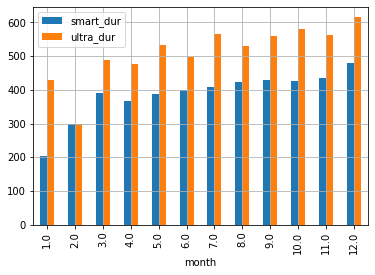

In [158]:
month_stat_dur.plot.bar().grid()

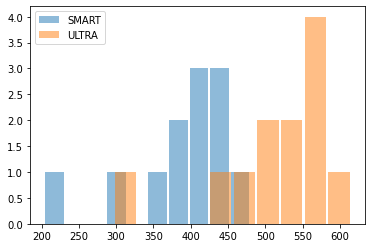

In [159]:
plt.hist(month_stat_dur['smart_dur'], alpha=0.5, rwidth=0.9, label="SMART")
plt.hist(month_stat_dur['ultra_dur'], alpha=0.5, rwidth=0.9, label="ULTRA")
plt.legend()

Как видно из графиков, количество звонков в среднем по обоим тарифам выросло по итогам года, достигло максимума в декабре.
 
Пользователи тарифа Ультра:
- в среднем тратят больше минут, что объяснимо, т.к. они имеют больший лимит смс;
- на графике наблюдается провал с феврале.
 
Пользователи тарифа Смарт:
- в среднем трятят меньше минут; максимум 450 в декабре
- рост количества звонков равномерный, за исключением подъема в марте.

In [160]:
month_stat_dur.describe()

,smart_dur,ultra_dur
count,12.000000,12.000000
mean,387.605810,511.234714
std,72.779777,84.765105
min,203.852941,297.125000
25%,382.304759,486.061958
50%,403.210359,532.430825
75%,428.259435,562.872688
max,479.985119,614.925373


In [161]:
smart_var_dur= np.var(month_stat_dur['smart_dur'], ddof=1)
smart_var_dur

5296.8959771205455

In [162]:
ultra_var_dur = np.var(month_stat_dur['ultra_dur'], ddof=1)
ultra_var_dur

7185.123007600402

### Затраты на смс

Построим график для сравнения среднего кол-ва сообщений по месяцам и тарифам:

In [163]:
month_stat_sms = month_stat.pivot_table(index='month', columns = 'tariff', values = 'message_count', aggfunc = 'mean')

In [164]:
month_stat_sms.columns = ['smart_sms', 'ultra_sms']

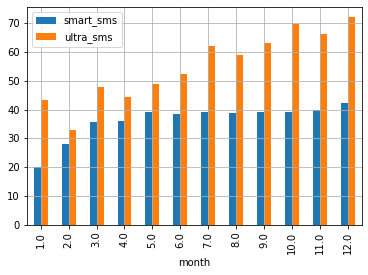

In [165]:
month_stat_sms.plot.bar().grid()

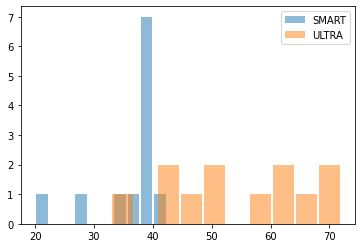

In [166]:
plt.hist(month_stat_sms['smart_sms'], alpha=0.5, rwidth=0.9, label="SMART")
plt.hist(month_stat_sms['ultra_sms'], alpha=0.5, rwidth=0.9, label="ULTRA")
plt.legend()

Тенденция к росту к концу года наблюдается и здесь.

Пользователи тарифа Ультра:
- в среднем тратят больше минут в месяц;
- резкий рост смс в марте, июле и октябре;
- на графике наблюдается провал с феврале.
 
Пользователи тарифа Смарт:
- с мая по ноябрь в среднем тратили до 40 смс в месяц;
- многие тратили максимум до 45 смс(что в пределах лимита по тарифу)

In [167]:
month_stat_sms.describe()

,smart_sms,ultra_sms
count,12.000000,12.000000
mean,36.262730,55.169629
std,6.229501,12.042615
min,20.000000,32.937500
25%,35.786119,46.978205
50%,38.869253,55.605580
75%,39.116941,64.010876
max,42.264808,72.008547


In [168]:
smart_var_sms= np.var(month_stat_sms['smart_sms'], ddof=1)
smart_var_sms

38.80668503759196

In [169]:
ultra_var_sms = np.var(month_stat_sms['ultra_sms'], ddof=1)
ultra_var_sms

145.0245868769887

### Затраты на интернет

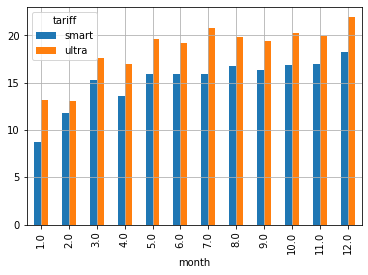

In [170]:
month_stat_gb = month_stat.pivot_table(index='month', columns = 'tariff', values = 'gb_used', aggfunc = 'mean')
month_stat_gb.plot.bar().grid()

In [171]:
month_stat_gb.columns = ['smart_gb', 'ultra_gb']

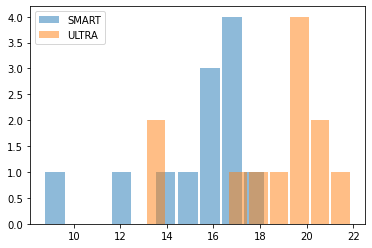

In [172]:
plt.hist(month_stat_gb['smart_gb'], alpha=0.5, rwidth=0.9, label="SMART")
plt.hist(month_stat_gb['ultra_gb'], alpha=0.5, rwidth=0.9, label="ULTRA")
plt.legend()

В конце года оба показателя выросли.

Пользователи тарифа Ультра:
- в среднем тратят больше гигабайт, что объяснимо, т.к. они имеют больший лимит;
- на графике снова наблюдается провал с феврале.
 
Пользователи тарифа Смарт:
- в среднем тратили гигабайты с превышением лимита.
- наблюдается резкий рост в марте.

In [173]:
month_stat_gb.describe()

,smart_gb,ultra_gb
count,12.000000,12.000000
mean,15.204689,18.481028
std,2.630856,2.798158
min,8.735294,13.090909
25%,14.831575,17.477396
50%,15.929510,19.539474
75%,16.826007,20.023542
max,18.201780,21.898551


In [174]:
smart_var_gb = np.var(month_stat_gb['smart_gb'], ddof=1)
smart_var_gb

6.9214038847684956

In [175]:
ultra_var_gb = np.var(month_stat_gb['ultra_gb'], ddof=1)
ultra_var_gb

7.829686050095753

**Вывод**

Итак, согласно данным более 69% пользователей подключены к тарифу Смарт. При этом, затраты на смс/звонки/интернет у пользователей тарифа Ультра значительно выше.

Ежемесячно по обоим тарифам растут показатели расхода смс, трафика и минут на разговор. Так же наблюдается провал в феврале у тарифа Ультра по всем показателям и скачок трат в тарифе Смарт в марте. Возможно, это связано с тем, что клиенты изменили тариф.

## Проверка гипотез и пояснения

### гипотеза 1. 

Для проверки того, что "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются" выдвинем гипотезы:

* Н0 - средняя выручка у Смарт и Ультра совпадает.
* Н1 - средняя выручка у тарифов Смарт и Ультра не совпадает.

Поскольку необходима проверка гипотезы о равенстве среднего двух независимых генеральных совокупностей по взятым из них выборкам - применим метод scipy.stats.ttest_ind(), добавим условие на неравенство дисперсий.
Критический уровень значимости  - 0,05;

In [176]:
smart_income = month_stat.query('tariff == "smart"')

In [177]:
ultra_income = month_stat.query('tariff != "smart"')

In [178]:
from scipy import stats as st
alpha = 0.05
results = st.ttest_ind(smart_income['income'], ultra_income['income'], equal_var = False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 1.927011394420941e-250
Отвергаем нулевую гипотезу


Маленькое p-value говорит, что вероятность случайного совпадения средних наших выборок ничтожно мало - мы отвергаем гипотзу Н0.
Таким образом, принимаем альтернативную гипотезу  Н1 о неравенстве средней выручки по тарифам Ультра и Смарт.

Значит, гипотеза №1 подтверждена.

### гипотеза 2.

Для проверки гипотезы №2 о том, что "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов" выдвинем гипотезы:

* Н0 - средняя выручка пользователей Москвы и других регионов совпадает;
* Н1 - средняя выручка пользователей из Москвы и других регионов не совпадает.

Поскольку необходима проверка гипотезы о равенстве среднего двух независимых генеральных совокупностей по взятым из них выборкам - применим метод scipy.stats.ttest_ind(), добавим условие на неравенство дисперсий.
Критический уровень значимости  - 0,05;

In [179]:
msk = month_stat.query('city == "Москва"')

In [180]:
no_msk= month_stat.query('city != "Москва"')

In [181]:
from scipy import stats as st
alpha = 0.05
results = st.ttest_ind(msk['income'], no_msk['income'], equal_var = False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.5216952110000278
Не получилось отвергнуть нулевую гипотезу


Значение p-value говорит о том, что вероятность случайно получить различия больше 52%. Это очень большая вероятность, чтобы судить о значимом различии средней выручки Москвы и других регионов. Поэтому нулевая гипотеза не отвергается.

Значит, вторая гипотеза опровергнута.

**Выводы**

Итак, первая гипотеза  о том, что "средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются" нашла свое подтверждение. Нулевая гипотеза о совпадении выручки была отвергнута. Что касается гипотезы №2 - она не подтвердилась, а значит Средняя выручка пользователей двух тарифов различается и не зависит от местонахождения пользователя.

## Общий вывод

Итак, согласно данным более 69% пользователей подключены к тарифу Смарт. При этом, затраты на смс/звонки/интернет у пользователей тарифа Ультра выше, что объяснимо большими лимитами по тарифному плану.

Ежемесячно по обоим тарифам растут показатели расхода смс, трафика и минут на разговор, достигая максимума в декабре. Так же наблюдается провал в феврале у тарифа Ультра по всем показателям и скачок трат в тарифе Смарт в марте. Возможно, это связано с тем, что клиенты изменили тариф.

Так же, для каждого пользователя мы посчитали:

- количество сделанных звонков и израсходованных минут разговора по месяцам(month_call);
-  количество отправленных сообщений по месяцам(month_sms);
-  объем израсходованного интернет-трафика по месяцам(month_session);
-  помесячную выручку.

Все эти данные объединены в датасет Month_stat. 

Были проверены 2 гипотезы о зависимости средней выручки от тарифа и от местонахождения клиента.
Гипотеза №1 подтвердилась, гипотеза №2 была опровергнута.